# Comparing Explainability Methods Under a White Box Model
This is a "fluorescent test," conducted under laboratory conditions with fluorescent lighting. In this test, we will generate synthetic data with known dynamics for the response variable. Next, we will calculate global explanations using various explainability methods and compare them against the ground truth.

In [1]:
from sklearn.model_selection import train_test_split

from explainer_comparison.ExplainerFactory import ExplainerFactory
from explainer_comparison.explainer_utilities import run_and_collect_explanations
from explainer_comparison.white_box_model.white_box import WhiteBoxRegressor
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Generate a White-Box Model and Data

In [2]:
model = WhiteBoxRegressor()
df = model.generate_synthetic_data(n_samples=1000, with_y=True)
X, y = df.drop(['y'], axis=1), df[['y']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Visualize Features and Target

<Axes: >

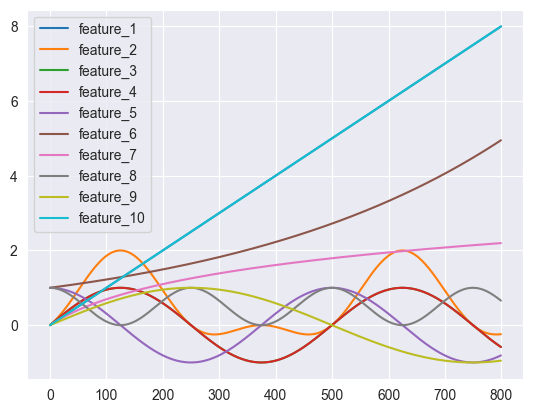

In [14]:
X_train.plot()

<Axes: >

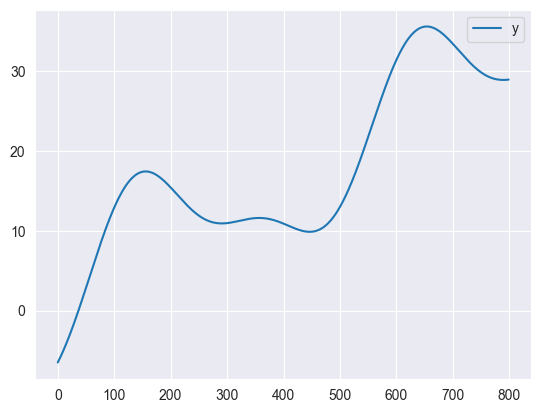

In [15]:
y_train.plot()

## Calculate SHAP and LIME explanation and Compare to Ground Truth

In [4]:
explainer_factory = ExplainerFactory(model, X_train, X_test, y_train, y_test)
results = run_and_collect_explanations(explainer_factory, X_train)
results['ground_truth'] = (X_train * model.coefficients_).mean()

  0%|          | 0/800 [00:00<?, ?it/s]


 SHAP explanation created

 LIME explanation created


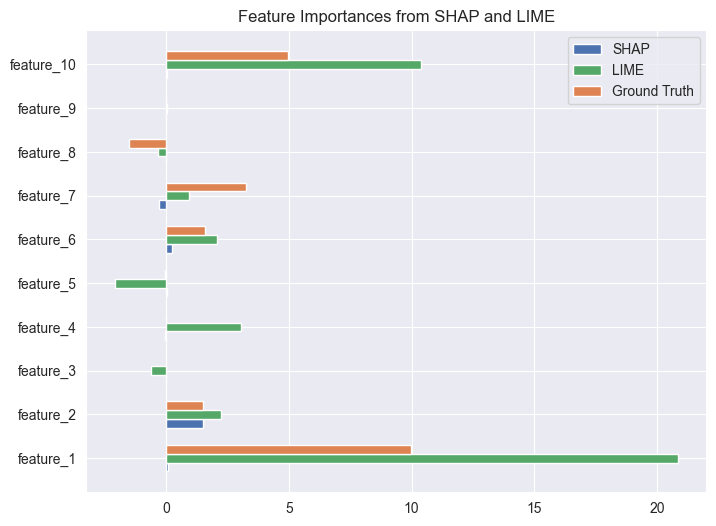

In [8]:
colors = sns.color_palette("deep")
plt.figure(figsize=(8, 6))

bar_positions = np.arange(len(results))  # Positions of the bars
bar_width = 0.2  # Adjust bar width to fit all bars

# Plotting the bars with adjusted positions
plt.barh(bar_positions - bar_width, results['SHAP Value'], height=bar_width, label='SHAP', color=colors[0])  # SHAP values
plt.barh(bar_positions, results['LIME Value'], height=bar_width, label='LIME', color=colors[2])  # LIME values
plt.barh(bar_positions + bar_width, results['ground_truth'], height=bar_width, label='Ground Truth', color=colors[1])  # Ground Truth values

plt.yticks(bar_positions, results.index)  #labels

plt.title('Feature Importances from SHAP and LIME')
plt.legend()
plt.show()